In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("questions.csv")
df.shape

(404351, 6)

In [21]:

df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
388142,388142,758799,758800,What is the one thing about men women dislike ...,What are some of the things women dislike abou...,1
128044,128044,253657,253658,What exactly must I do to get into Yale?,Can I get into Yale?,0
175242,175242,346208,346209,What is the best solution to the Kashmir confl...,What is the solution of Kashmir conflict?,1
75440,75440,149909,149910,Which iOS DLNA player lets you configure a con...,Which iOS SSH apps use the ssh:// hook for cro...,0
291373,291373,572468,572469,What are the most empirically neutral and unbi...,Is there a site that presents truly unbiased n...,0
320822,320822,629409,629410,What is the best incest family tree you can make?,What does your family tree look like?,0
13437,13437,26826,26827,Is it possible in any way to save the money if...,In whose favor do we have to make a demand dra...,0
21463,21463,42820,42821,What is the best torrent site for books?,Where can I get online PDF or EPUB versions of...,0
57668,57668,114735,114736,Are all female porn stars lesbians?,Are most female pornstars bisexual? Why?,0
242747,242747,478108,478109,How do I prepare for ACM ICPC?,How should I prepare for ACM-ICPC?,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [23]:
# missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [24]:
# duplicate rows
df.duplicated().sum()

0

0    255045
1    149306
Name: is_duplicate, dtype: int64
0    63.07515
1    36.92485
Name: is_duplicate, dtype: float64


<Axes: >

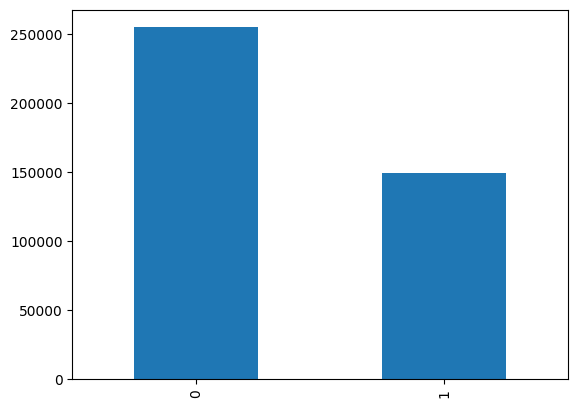

In [25]:
# Distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [26]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 789801
Number of questions getting repeated 13698


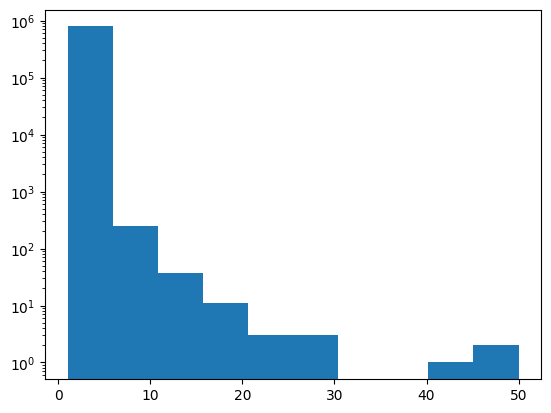

In [27]:

plt.hist(qid.value_counts().values)
plt.yscale('log')
plt.show()

In [28]:
new_df = df.sample(30000)

In [29]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       1
is_duplicate    0
dtype: int64

In [30]:
new_df.duplicated().sum()

0

In [31]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
333009,How did RBI know that Urjit Patel would be RBI...,Why does the new 2000 rupee note has a signatu...
108263,How do I convert this 35 mm film camera to a d...,Describe a digital camera. How is it different...
85423,Why is Saltwater taffy candy imported in Japan?,Why is saltwater taffy candy imported in Brazil?
46323,Will I grow any taller at 15?,How can I grow taller at the age of 15?
281970,How do I find a good book editor?,What is the best way to find a good book editor?


In [33]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

ques_df['question1'].fillna('', inplace=True)
ques_df['question2'].fillna('', inplace=True)

questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)

q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(), 2)


<ipython-input-33-628112062e61>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_df['question1'].fillna('', inplace=True)
<ipython-input-33-628112062e61>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_df['question2'].fillna('', inplace=True)


In [34]:
q1_arr
q2_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [35]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [36]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
333009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85423,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46323,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
281970,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376757,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
371240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
165887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
344105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9996666666666667